In [207]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [208]:
datafile = pathlib.Path() / "wetterdaten_freiburg_2022_2024.csv"

data = pd.read_csv(datafile, sep=";")
data.describe()

STATIONS_ID    MESS_DATUM         QN_4       TT_TER       RF_TER
count       1939.0  1.939000e+03  1939.000000  1939.000000  1939.000000
mean        1443.0  2.023268e+09     5.121712    -1.439144    58.563177
std            0.0  5.373317e+05     3.262451   114.311663   122.156135
min         1443.0  2.022111e+09     1.000000  -999.000000  -999.000000
25%         1443.0  2.023042e+09     3.000000     6.200000    59.000000
50%         1443.0  2.023092e+09     3.000000    10.900000    74.000000
75%         1443.0  2.024012e+09     9.000000    16.600000    87.000000
max         1443.0  2.024052e+09     9.000000    34.300000   100.000000

In [209]:
data["MESS_DATUM"] = pd.to_datetime(data["MESS_DATUM"], format="%Y%m%d%H")
data.describe()

STATIONS_ID                     MESS_DATUM         QN_4       TT_TER  \
count       1939.0                           1939  1939.000000  1939.000000   
mean        1443.0  2023-09-03 09:01:23.548220672     5.121712    -1.439144   
min         1443.0            2022-11-13 06:00:00     1.000000  -999.000000   
25%         1443.0            2023-04-23 15:00:00     3.000000     6.200000   
50%         1443.0            2023-09-16 12:00:00     3.000000    10.900000   
75%         1443.0            2024-01-15 15:00:00     9.000000    16.600000   
max         1443.0            2024-05-15 18:00:00     9.000000    34.300000   
std            0.0                            NaN     3.262451   114.311663   

            RF_TER  
count  1939.000000  
mean     58.563177  
min    -999.000000  
25%      59.000000  
50%      74.000000  
75%      87.000000  
max     100.000000  
std     122.156135

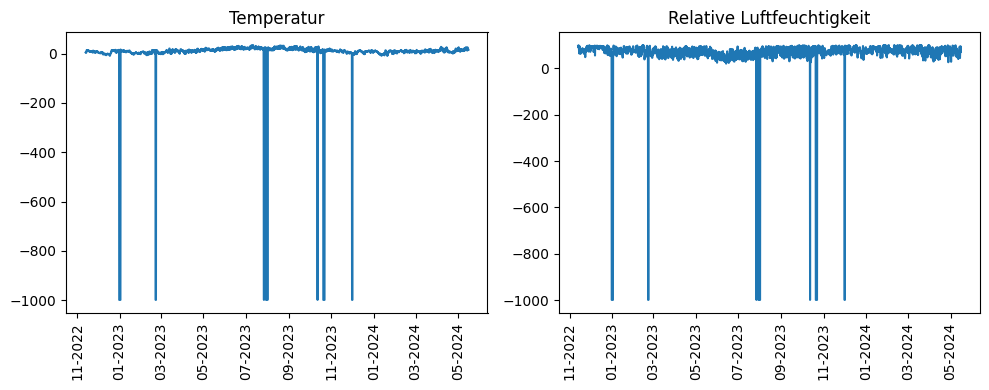

In [210]:
data.drop(["STATIONS_ID", "QN_4", "eor"], axis=1, inplace=True)

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
ax.plot(data["MESS_DATUM"], data["TT_TER"])
ax.set_title("Temperatur")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

ax = plt.subplot(1, 2, 2)
ax.plot(data["MESS_DATUM"], data["RF_TER"])
ax.set_title("Relative Luftfeuchtigkeit")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

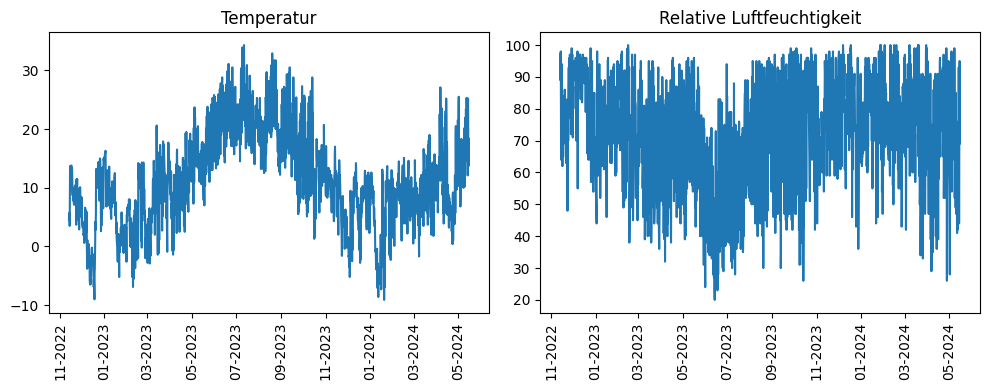

In [211]:
# Fehlerwerte vereinheitlichen
data.replace(-999, np.nan, inplace=True)

# Fehlende Werte durch Interpolation ersetzen
data["TT_TER"] = data["TT_TER"].interpolate()
data["RF_TER"] = data["RF_TER"].interpolate()

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
ax.plot(data["MESS_DATUM"], data["TT_TER"])
ax.set_title("Temperatur")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

ax = plt.subplot(1, 2, 2)
ax.plot(data["MESS_DATUM"], data["RF_TER"])
ax.set_title("Relative Luftfeuchtigkeit")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

plt.tight_layout()
plt.show()